In [1]:
import os
import numpy as np
import pandas as pd

from src.process import Processor, TranTestSplit
from src.models import get_result, ModelHub, HGDeepForestClassifier, StackingLR, ResHGDeepForest
from src.metric import Metric

In [1]:
import pickle

with open('data/model_res.pkl', 'rb') as f:
    result = pickle.load(f)

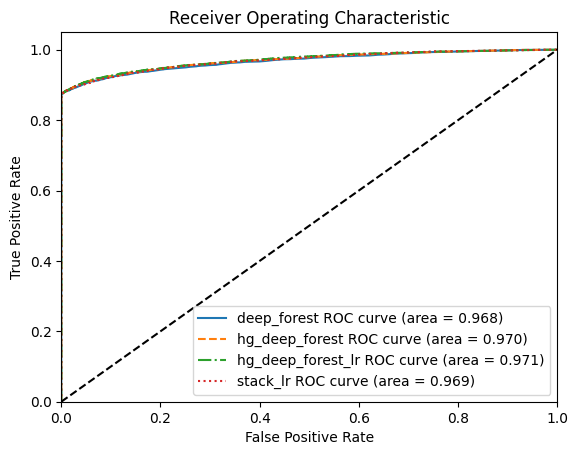

In [17]:
curves = dict()
for r in result:
    if r['model_name'] not in ['deep_forest', 'hg_deep_forest', 'hg_deep_forest_lr', 'stack_lr']:
        continue
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'].values, r['proba']]
    else:
        curves[r['model_name']] = [r['label'].values, r['proba'][:, 1]]
Metric.gather_roc_curve(curves)

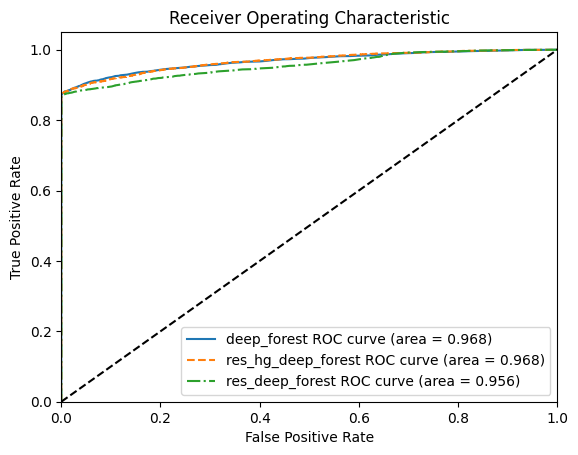

In [18]:
curves = dict()
for r in result:
    if r['model_name'] not in ['deep_forest', 'res_deep_forest', 'res_hg_deep_forest']:
        continue
    if r['proba'].ndim == 1:
        curves[r['model_name']] = [r['label'].values, r['proba']]
    else:
        curves[r['model_name']] = [r['label'].values, r['proba'][:, 1]]
Metric.gather_roc_curve(curves)

In [3]:
result1 = []
for i in result:
    result1.append({'model_name': i['model_name'], 'label': i['label'], 'proba': i['proba']})

In [5]:
with open('data/model_res_1.pkl', 'wb') as f:
    pickle.dump(result1, f)